In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Read the dataset to the python environment.

In [126]:
data=pd.read_excel("iris2.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps.

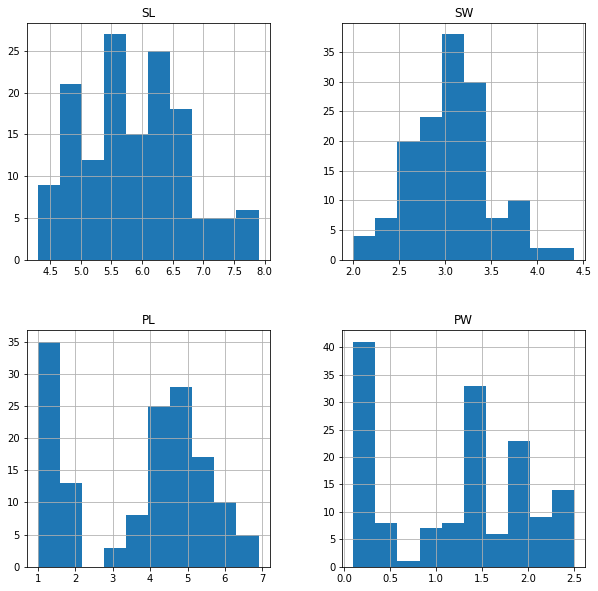

In [127]:
data.hist(figsize=(10,10))
plt.show()

In [128]:
data.shape

(150, 5)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [130]:
data.duplicated(keep='first').sum()

3

We can see that there are 3 duplicated data in the data set.

In [131]:
data[data.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [132]:
data.drop_duplicates(keep='first',inplace=True)

We remove the duplicated data.

In [133]:
data.duplicated().sum()

0

In [134]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are 19 missing values in the dataset.

<AxesSubplot:>

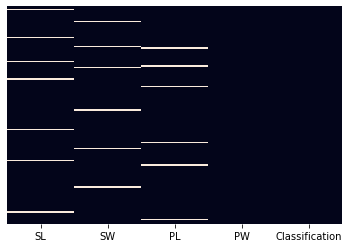

In [135]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [136]:
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

We fill the missing data with the help of median

In [137]:
data.describe()

,SL,SW,PL,PW
count,147.000000,147.000000,147.000000,147.000000
mean,5.866667,3.048980,3.804082,1.208844
std,0.809053,0.425291,1.723682,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


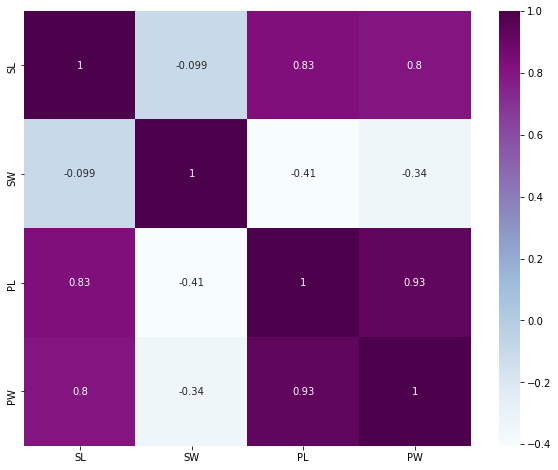

In [138]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='BuPu',annot=True);

<AxesSubplot:xlabel='SL'>

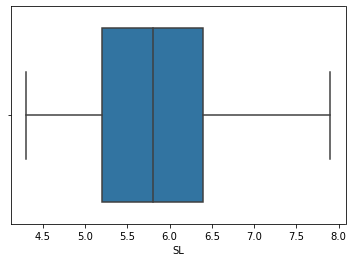

In [139]:
sns.boxplot(x=data['SL'])

<AxesSubplot:xlabel='SW'>

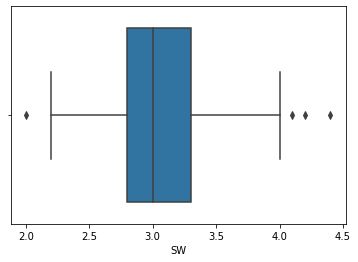

In [140]:
sns.boxplot(x=data['SW'])

We can see that there are outliers in the sepal width column.

In [141]:
Q1 = data['SW'].quantile(0.25)
Q3 = data['SW'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['SW']=np.where(data['SW']>upper_whisker,upper_whisker,np.where(data['SW']<lower_whisker,lower_whisker,data['SW']))

<AxesSubplot:xlabel='SW'>

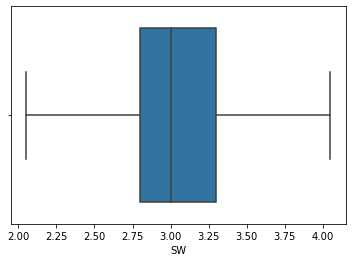

In [142]:
sns.boxplot(x=data['SW'])

We removed the sepal width of outliers.

<AxesSubplot:xlabel='PL'>

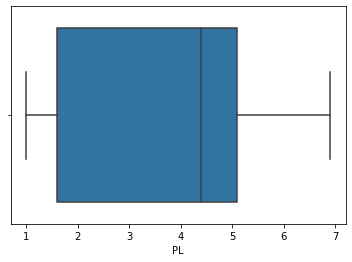

In [143]:
sns.boxplot(x=data['PL'])

<AxesSubplot:xlabel='PW'>

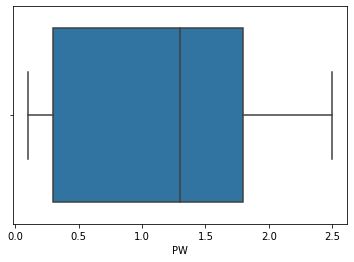

In [144]:
sns.boxplot(x=data['PW'])

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [145]:
X=data.drop(['Classification'],axis=1)
X.head()
X.shape

(147, 4)

In [146]:
Y=data['Classification']
Y.head()
Y.shape

(147,)

In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.20,random_state=40)

print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (117, 4)
x_test: (30, 4)
y_train: (117,)
y_test: (30,)


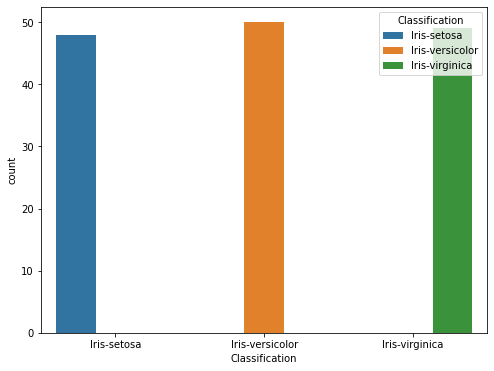

In [148]:
plt.figure(figsize=(8,6))
sns.countplot(Y,hue=Y);

# DECISION TREE CLASSIFIER

In [155]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_dtc = dtc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test, y_dtc))
print("F1 score:", f1_score(y_test,y_dtc,average='macro'))

Accuracy score: 0.9
F1 score: 0.9041394335511983


confusion matrix:
[[ 8  0  0]
 [ 0 12  3]
 [ 0  0  7]]
accuracy score: 0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.80      0.89        15
 Iris-virginica       0.70      1.00      0.82         7

       accuracy                           0.90        30
      macro avg       0.90      0.93      0.90        30
   weighted avg       0.93      0.90      0.90        30



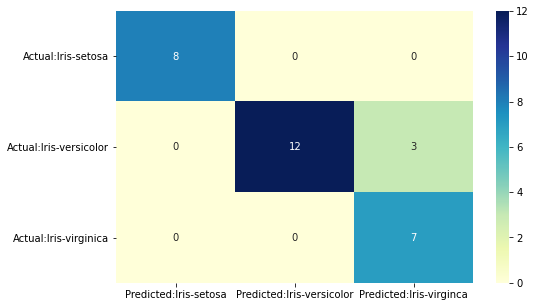

In [70]:
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:Iris-setosa','Predicted:Iris-versicolor','Predicted:Iris-virginca'],index=['Actual:Iris-setosa','Actual:Iris-versicolor','Actual:Iris-virginica'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");
print("confusion matrix:")
print(cm)
print("accuracy score:",accuracy_score(y_test,y_dtc))
print(classification_report(y_test,y_dtc))

We got the the accuracy score as 90% for decisin tree classifier with an f1 score of 90.41%

# RANDOM FOREST CLASSIFIER

In [156]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier()
rf.fit(x_train, y_train)
y_rf = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test, y_dtc))
print("F1 score:", f1_score(y_test,y_dtc,average='macro'))

Accuracy score: 0.9
F1 score: 0.9041394335511983


confusion matrix:
[[ 7  1  0]
 [ 0 12  3]
 [ 0  0  7]]
accuracy score: 0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.80      0.89        15
 Iris-virginica       0.70      1.00      0.82         7

       accuracy                           0.90        30
      macro avg       0.90      0.93      0.90        30
   weighted avg       0.93      0.90      0.90        30



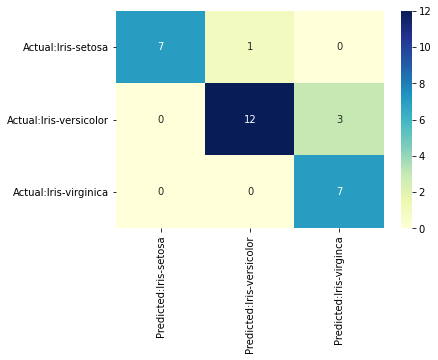

In [105]:
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:Iris-setosa','Predicted:Iris-versicolor','Predicted:Iris-virginca'],index=['Actual:Iris-setosa','Actual:Iris-versicolor','Actual:Iris-virginica'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");
print("confusion matrix:")
print(cm)
print("accuracy score:",accuracy_score(y_test,y_rf))
print(classification_report(y_test,y_rf))

Random forest classifier also have a accuracy score of 90% and f1 score of 90.41%

# LOGISITC REGRESSION

In [150]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [151]:
y_predicted=model.predict(x_test)
y_predicted

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [152]:
model.score(x_test,y_test)

0.8666666666666667

confusion matrix:
[[ 7  1  0]
 [ 0 12  3]
 [ 0  0  7]]
accuracy score: 0.8666666666666667
f1 score: 0.8713352007469654
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.88      0.93         8
Iris-versicolor       0.92      0.80      0.86        15
 Iris-virginica       0.70      1.00      0.82         7

       accuracy                           0.87        30
      macro avg       0.87      0.89      0.87        30
   weighted avg       0.89      0.87      0.87        30



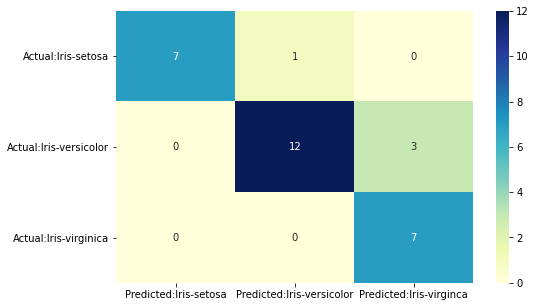

In [159]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test,y_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:Iris-setosa','Predicted:Iris-versicolor','Predicted:Iris-virginca'],index=['Actual:Iris-setosa','Actual:Iris-versicolor','Actual:Iris-virginica'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");
print("confusion matrix:")
print(cm)
print("accuracy score:",accuracy_score(y_test,y_predicted))
print("f1 score:",f1_score(y_test,y_predicted,average="macro"))
print(classification_report(y_test,y_predicted))

Logistic regresion have a accuracy score of 86.67% and f1 score of 87.13%

Random forest classifier and decision tree have more accuracy compared to logistic regression. 